In [1]:
import numpy as np 
import pandas as pd
import chess.svg
import sys

puzzles =  pd.read_csv('Data\\cleaned_puzzles.csv')

In [2]:
puzzles.head(3)

,0,1,2,3,4,5,6,7,8,9,...,Rating,RatingDeviation,square,square_two,first,second,third,fourth,fifth,sixth
0,4,0,0,0,0,0,0,6,1,1,...,1736,78,14,23,2,-4,5,-3,5,-5
1,0,0,0,0,0,4,6,0,0,1,...,1513,74,16,44,-5,4,-5,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1495,155,31,40,-1,1,-1,6,-1,6


####################################################################################################

Would like to:

-augment data with multiple columns of square to show importance of location relative to board structure

-fix data for each type of piece in game, would prefer rather than manually making for individual pieces to have it processed based on movement types, structure of mobility

-for third,fifth pieces, how to make them vote for first based on board structure? 

-for defensive team, how to make them recognize threat posed by offensive potential of first piece

-determine if need to remake dataset with locations of second-sixth pieces (later) get it working with as is for now...

####################################################################################################

In [2]:
data = puzzles.loc[:, :'63'].copy()

In [5]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4,0,0,0,0,0,0,6,1,1,...,-1,-1,0,0,0,0,0,0,0,-6
1,0,0,0,0,0,4,6,0,0,1,...,-1,-1,0,0,0,-4,0,0,-6,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# don't run this...
#for index in range(64,74):
    #data[str(index)] = data['first']

In [9]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4,0,0,0,0,0,0,6,1,1,...,-1,-1,0,0,0,0,0,0,0,-6
1,0,0,0,0,0,4,6,0,0,1,...,-1,-1,0,0,0,-4,0,0,-6,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0,0,6,...,-1,-1,0,0,0,0,0,0,-6,0
4,0,0,0,0,0,4,0,6,0,0,...,-1,0,0,0,-4,0,0,0,-6,0


In [3]:
data_y = puzzles['square']

####################################################################################################

quick test to check...

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




In [5]:
X_train, X_test, y_train, y_test = train_test_split( data.to_numpy(), data_y.to_numpy(), train_size = 0.5, test_size=0.1, random_state=42)

In [36]:
len(X_train)

1284048

In [35]:
model = LogisticRegression(C=1e5, multi_class="multinomial", solver="lbfgs", max_iter=1000, penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=1000, multi_class='multinomial')

In [37]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.2133572888240938


<AxesSubplot: >

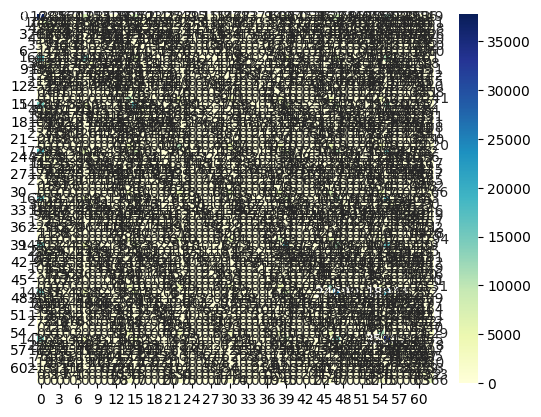

In [39]:
# some visualization
import seaborn as sns
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix,annot = True,fmt='g',cmap="YlGnBu")


####################################################################################################

try with best move

####################################################################################################

Tensorflow

In [3]:
# https://www.tensorflow.org/tutorials/keras/regression

In [6]:
test_results = {}

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [51]:
X = np.array(X_train)

X_normalizer = layers.Normalization(input_shape=[64,], axis=None)
X_normalizer.adapt(X)

SyntaxError: invalid syntax (2930437986.py, line 3)

In [37]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
  return model

In [39]:
dnn_X_model = build_and_compile_model(X_normalizer)

In [40]:
dnn_X_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 64)               3         
 ion)                                                            
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                      

In [41]:
%%time
history = dnn_X_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=5)

Wall time: 3min 45s


In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

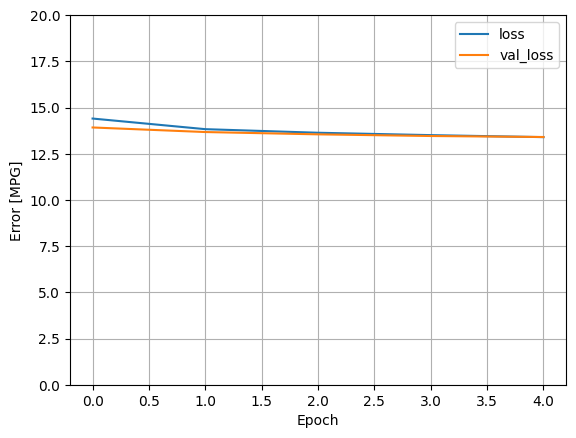

In [43]:
plot_loss(history)

##################################################################################

First run - oops 64 outputs

In [55]:

test_results['dnn_X_model'] = dnn_X_model.evaluate(X_test, y_test, verbose=0)

In [56]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_X_model,13.436015


##################################################################################

Second run

In [44]:

test_results['dnn_X_model_64x32x32x16'] = dnn_X_model.evaluate(X_test, y_test, verbose=0)

In [45]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_X_model,13.307940
dnn_X_model_64x32x32x16,13.444373


In [46]:
test_predictions = dnn_X_model.predict(X_test)

8026/8026 [==============================] - 10s 1ms/step


In [47]:
test_predictions[0:10]

array([[38.896],
       [39.858],
       [47.664],
       [38.153],
       [28.606],
       [32.877],
       [31.906],
       [39.288],
       [19.732],
       [25.322]], dtype=float32)

NameError: name 'y_test' is not defined

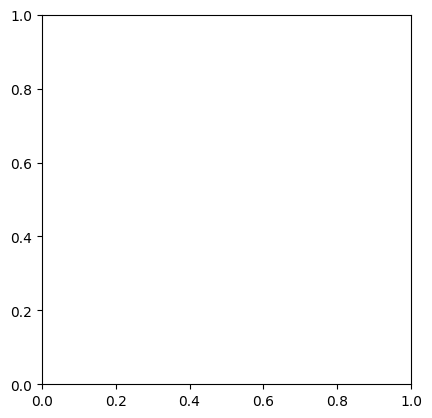

In [38]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 65]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

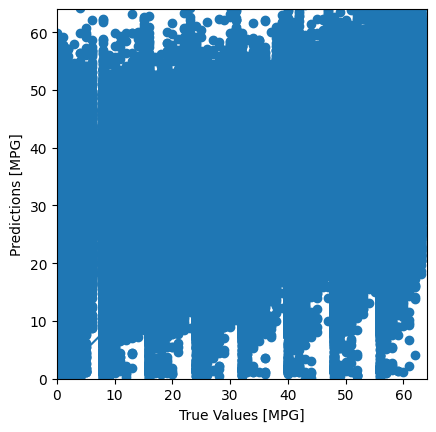

In [48]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 64]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [22]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

MemoryError: Unable to allocate 491. GiB for an array with shape (256810, 256810) and data type float64

##################################################################################

new Model type time... 

In [4]:
test_results = {}

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [6]:
puzzles =  pd.read_csv('Data\\cleaned_puzzles.csv')

In [52]:
# https://manuel-gilm.medium.com/multi-target-regression-with-tensorflow-a7d974cf5d89

In [8]:
from sklearn.model_selection import train_test_split

#Train test split
x_train, x_test = train_test_split(puzzles, test_size = 0.2)

#train values
Y1_train = np.array(x_train["square"])
Y2_train = np.array(x_train["square_two"])

#test values
Y1_test = np.array(x_test["square"])
Y2_test = np.array(x_test["square_two"])

#remove the target values from the dataset
x_train = x_train.loc[:, :'63']
x_test = x_test.loc[:, :'63']

#Normalizing the data set
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()

In [9]:
# https://stackoverflow.com/questions/44036971/multiple-outputs-in-keras

from keras.models import Model
from keras.layers import *    

# defining layers
input_layer = Input(shape=(len(x_train.columns)))
dense_layer_1 = Dense(units = 128, activation = "relu")(input_layer) 
dense_layer_2 = Dense(units = 128, activation = "relu")(dense_layer_1)
dense_layer_3 = Dense(units = 64, activation = "relu")(dense_layer_2)

#Y1 output
y1_output = Dense(units = 1, activation = "linear", name = "y1_output")(dense_layer_2)

#Y2 output
y2_output = Dense(units = 1, activation = "linear", name = "y2_output")(dense_layer_3)

#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])


#specify the optimizer and compile with the loss function for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer = optimizer,
              loss = {'y1_output':'mse', 'y2_output':'mse'},
              metrics = {
                  'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                  'y2_output':tf.keras.metrics.RootMeanSquaredError(),
              }
             )

In [10]:
#training process
history = model.fit(x_train_norm, (Y1_train, Y2_train), epochs = 2, batch_size = 10,
                    validation_data = (x_test_norm, (Y1_test, Y2_test)), verbose = 0)

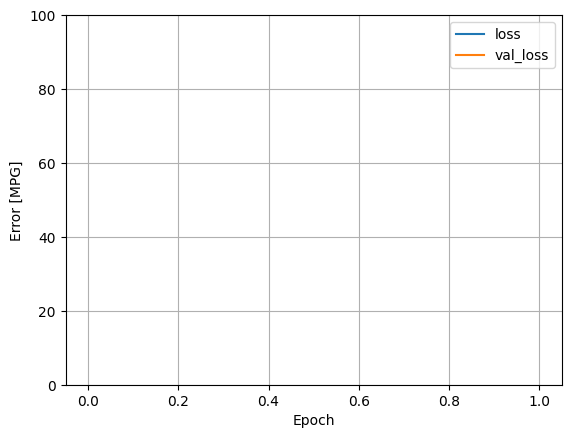

In [12]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [13]:
test_results = {}

In [14]:
test_results['dual_target'] = model.evaluate(x_test_norm, (Y1_test, Y2_test), verbose=0)

In [16]:
test_results

{'dual_target': [511.1725158691406,
  281.4206237792969,
  229.75279235839844,
  16.775596618652344,
  15.157598495483398]}

In [15]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

ValueError: Length of values (5) does not match length of index (1)

In [17]:
test_predictions = model.predict(x_test_norm)

16051/16051 [==============================] - 22s 1ms/step


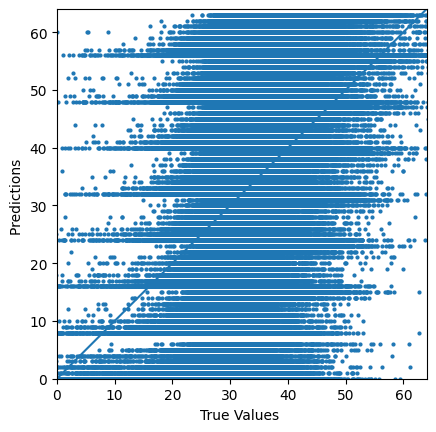

In [26]:
a = plt.axes(aspect='equal')
plt.scatter(test_predictions[0], Y1_test, s=4)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 64]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

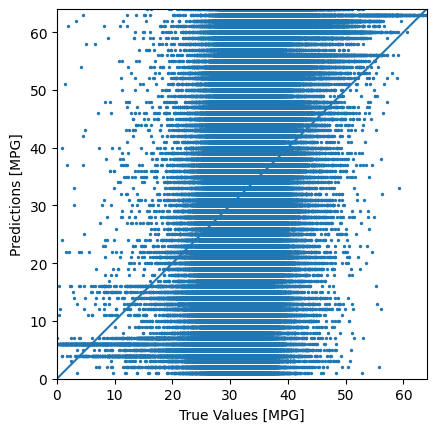

In [27]:
a = plt.axes(aspect='equal')
plt.scatter(test_predictions[1], Y2_test, s=2)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 64]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [20]:
test_predictions[0:5]

[array([[35.39 ],
        [29.23 ],
        [27.405],
        ...,
        [28.568],
        [19.818],
        [39.172]], dtype=float32),
 array([[32.876],
        [33.423],
        [29.037],
        ...,
        [31.44 ],
        [21.009],
        [37.526]], dtype=float32)]

In [21]:
Y2_test[0:5]

array([12, 46, 55, 30, 39], dtype=int64)

In [22]:
Y1_test[0]

array([23, 49, 41, 51, 32], dtype=int64)

##################################################################################

More epochs please....?

In [29]:
from sklearn.model_selection import train_test_split

#Train test split
x_train, x_test = train_test_split(puzzles, test_size = 0.2)

#train values
Y1_train = np.array(x_train["square"])
Y2_train = np.array(x_train["square_two"])

#test values
Y1_test = np.array(x_test["square"])
Y2_test = np.array(x_test["square_two"])

#remove the target values from the dataset
x_train = x_train.loc[:, :'63']
x_test = x_test.loc[:, :'63']

#Normalizing the data set
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()

In [30]:
# https://stackoverflow.com/questions/44036971/multiple-outputs-in-keras

from keras.models import Model
from keras.layers import *    

# defining layers
input_layer = Input(shape=(len(x_train.columns)))
dense_layer_1 = Dense(units = 128, activation = "relu")(input_layer) 
dense_layer_2 = Dense(units = 128, activation = "relu")(dense_layer_1)
dense_layer_3 = Dense(units = 64, activation = "relu")(dense_layer_2)
dense_layer_4 = Dense(units = 64, activation = "relu")(dense_layer_3)

#Y1 output
y1_output = Dense(units = 1, activation = "linear", name = "y1_output")(dense_layer_2)

#Y2 output
y2_output = Dense(units = 1, activation = "linear", name = "y2_output")(dense_layer_3)

#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])


#specify the optimizer and compile with the loss function for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer = optimizer,
              loss = {'y1_output':'mse', 'y2_output':'mse'},
              metrics = {
                  'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                  'y2_output':tf.keras.metrics.RootMeanSquaredError(),
              }
             )

In [31]:
#training process
history = model.fit(x_train_norm, (Y1_train, Y2_train), epochs = 50, batch_size = 10,
                    validation_data = (x_test_norm, (Y1_test, Y2_test)), verbose = 0)

In [32]:
test_results['dual_target_50epochs'] = model.evaluate(x_test_norm, (Y1_test, Y2_test), verbose=0)


In [33]:
test_predictions = model.predict(x_test_norm)

16051/16051 [==============================] - 24s 1ms/step


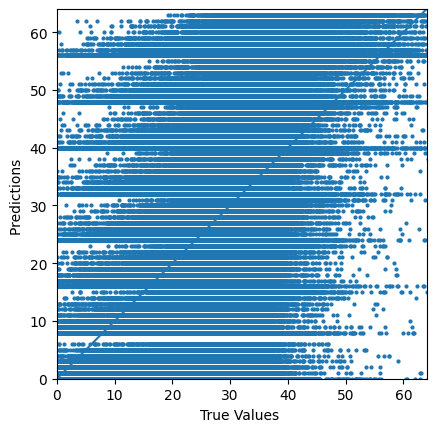

In [34]:
a = plt.axes(aspect='equal')
plt.scatter(test_predictions[0], Y1_test, s=4)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 64]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

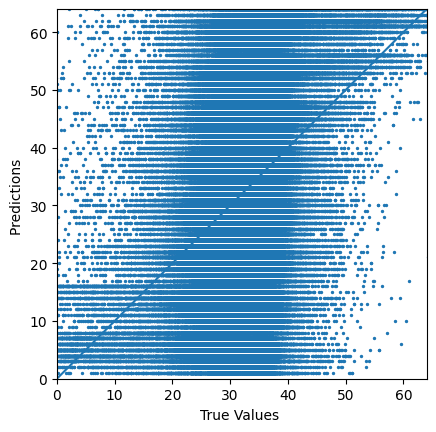

In [39]:
a = plt.axes(aspect='equal')
plt.scatter(test_predictions[1], Y2_test, s=2)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 64]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [37]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model\\model_50epochs')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model\model_50epochs\assets


INFO:tensorflow:Assets written to: saved_model\model_50epochs\assets


##################################################################################

Let's get twin primed